In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
columns = ['Area', 'Perimeter', 'Compactness', 'Length_of_kernel', 'Width_of_kernel', 'AsymmetryCoeff', 'GrooveLength', 'Class']
df = pd.read_csv(url, sep='\s+', names=columns)

In [3]:
print("Number of instances:", df.shape[0])
print("Number of attributes:", df.shape[1] - 1)

Number of instances: 210
Number of attributes: 7


In [4]:
df.head()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,AsymmetryCoeff,GrooveLength,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [6]:
y = df['Class']
X = df.drop('Class', axis =1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99, stratify=y)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
kernels = {'linear', 'poly', 'rbf', 'sigmoid'}

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC


results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=99)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[kernel] = (acc, cm)
    print(f"\nKernel: {kernel}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)


Kernel: poly
Accuracy: 0.8571428571428571
Confusion Matrix:
 [[21  0  0]
 [ 3 18  0]
 [ 6  0 15]]

Kernel: linear
Accuracy: 0.9523809523809523
Confusion Matrix:
 [[18  1  2]
 [ 0 21  0]
 [ 0  0 21]]

Kernel: sigmoid
Accuracy: 0.9365079365079365
Confusion Matrix:
 [[17  1  3]
 [ 0 21  0]
 [ 0  0 21]]

Kernel: rbf
Accuracy: 0.9206349206349206
Confusion Matrix:
 [[18  1  2]
 [ 0 21  0]
 [ 2  0 19]]


In [17]:
best_kernel = max(results, key=lambda k: results[k][0])
print("Best Kernel:", best_kernel)

Best Kernel: linear


In [18]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

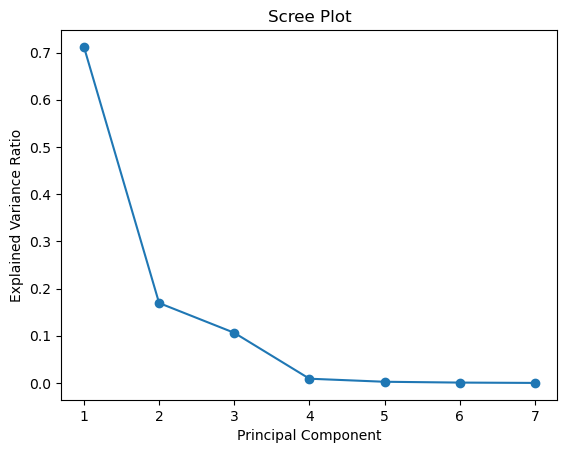

In [19]:
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [20]:
pca_2 = PCA(n_components=2)
X_train_pc2 = pca_2.fit_transform(X_train)
X_test_pc2 = pca_2.transform(X_test)

In [22]:
svm_pca = SVC(kernel=best_kernel, random_state=99)
svm_pca.fit(X_train_pc2, y_train)
y_pred_svm = svm_pca.predict(X_test_pc2)
acc_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)
print("SVM Confusion Matrix:\n", cm_svm)

SVM Accuracy: 0.9206349206349206
SVM Confusion Matrix:
 [[18  1  2]
 [ 0 21  0]
 [ 2  0 19]]


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
